# GMM Anomaly Detection in contextual tokens

In [1]:
import sys
sys.path.append('../')

import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

import src.sentpair_generator
import src.anomaly_model

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Pick random subset of sentences

In [2]:
with open('../data/bnc.pkl', 'rb') as f:
  bnc_sentences = pickle.load(f)

random.seed(12345)
bnc_sentences = random.sample(bnc_sentences, 1000)

## Plot of GMM score at each layer and word

In [3]:
model = src.anomaly_model.AnomalyModel(bnc_sentences)

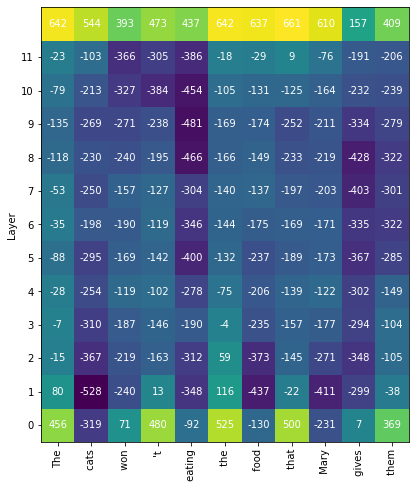

In [4]:
def all_layer_scores(sent):
  tokens, all_layer = model.gmm_score([sent])
  tokens = tokens[0]
  all_layer = all_layer[0]
  plt.figure(figsize=(8, 8))
  plt.imshow(all_layer, origin='lower')
  plt.xticks(range(len(tokens)), tokens, rotation='vertical')
  plt.yticks(range(12), range(12))
  plt.ylabel('Layer')
  for (j,i),label in np.ndenumerate(all_layer):
    plt.text(i, j, int(label), ha='center', va='center', color='white')
  plt.show()

all_layer_scores("The cats won't eating the food that Mary gives them.")

In [ ]:
all_layer_scores("Corey's hamster entertained a nearby backpack and filled it with sawdust.")

## Evaluate on Osterhout / Nicol data

In [6]:
sentgen = src.sentpair_generator.SentPairGenerator()

In [7]:
def process_sentpair_dataset(csvname, correct_col, wrong_col):
  scores = []
  for layer in range(13):
    results = model.eval_sent_pairs(sentgen.get_csv_based_dataset(csvname, correct_col, wrong_col), layer)
    score = sum(results) / len(results)
    scores.append(score)
    print(layer, score)
    
  plt.plot(scores)
  plt.ylim((0, 1))
  plt.xticks(range(0, 13))
  plt.title(f"{csvname}: {correct_col} vs {wrong_col}")
  plt.xlabel('Layer')
  plt.ylabel('GMM Accuracy')
  plt.show()

0 0.5222222222222223
1 0.6111111111111112
2 0.8
3 0.9333333333333333
4 0.9777777777777777
5 0.9888888888888889
6 0.9888888888888889
7 0.9888888888888889
8 0.9888888888888889
9 0.9888888888888889
10 0.9777777777777777
11 0.9888888888888889
12 0.9111111111111111


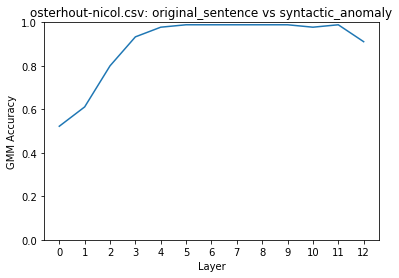

In [8]:
process_sentpair_dataset('osterhout-nicol.csv', 'original_sentence', 'syntactic_anomaly')

0 0.5333333333333333
1 0.4
2 0.4
3 0.4444444444444444
4 0.6222222222222222
5 0.5555555555555556
6 0.5777777777777777
7 0.6666666666666666
8 0.6333333333333333
9 0.7333333333333333
10 0.8444444444444444
11 0.8555555555555555
12 0.6888888888888889


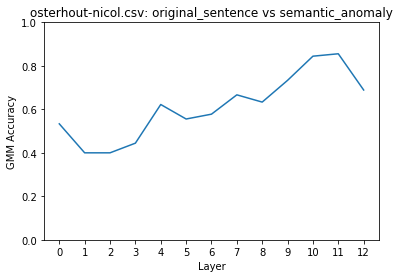

In [9]:
process_sentpair_dataset('osterhout-nicol.csv', 'original_sentence', 'semantic_anomaly')

## Evaluate on Pylkkanen data

0 0.38571428571428573
1 0.2714285714285714
2 0.24285714285714285
3 0.32857142857142857
4 0.5285714285714286
5 0.5
6 0.5142857142857142
7 0.5571428571428572
8 0.5571428571428572
9 0.5714285714285714
10 0.5857142857142857
11 0.7
12 0.6714285714285714


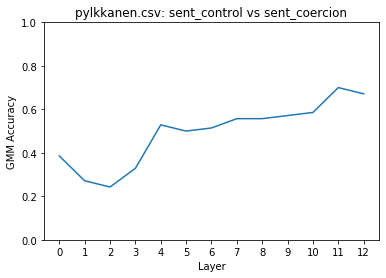

In [10]:
process_sentpair_dataset('pylkkanen.csv', 'sent_control', 'sent_coercion')

0 0.7
1 0.5285714285714286
2 0.45714285714285713
3 0.6571428571428571
4 0.8
5 0.9285714285714286
6 0.9857142857142858
7 0.9428571428571428
8 0.9285714285714286
9 0.9571428571428572
10 0.9285714285714286
11 0.9571428571428572
12 0.8142857142857143


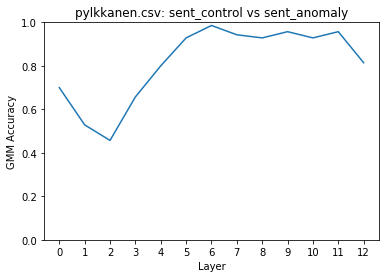

In [11]:
process_sentpair_dataset('pylkkanen.csv', 'sent_control', 'sent_anomaly')

## Evaluate on Warren data

0 0.36666666666666664
1 0.3333333333333333
2 0.43333333333333335
3 0.4666666666666667
4 0.5333333333333333
5 0.6
6 0.6
7 0.5666666666666667
8 0.5666666666666667
9 0.5
10 0.6
11 0.6
12 0.6666666666666666


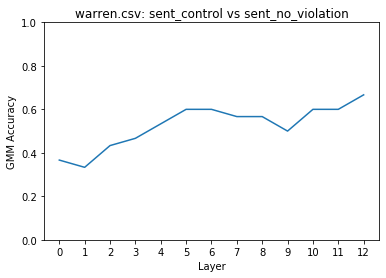

In [12]:
process_sentpair_dataset('warren.csv', 'sent_control', 'sent_no_violation')

0 0.4666666666666667
1 0.36666666666666664
2 0.43333333333333335
3 0.4666666666666667
4 0.6
5 0.6333333333333333
6 0.6
7 0.7333333333333333
8 0.7333333333333333
9 0.8
10 0.8
11 0.8333333333333334
12 0.9333333333333333


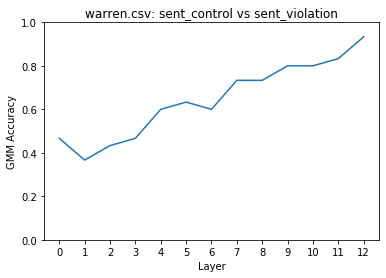

In [13]:
process_sentpair_dataset('warren.csv', 'sent_control', 'sent_violation')

## Datasets from Ettinger 2020: CPRAG-34 and ROLE-88)

0 0.5294117647058824
1 0.47058823529411764
2 0.4117647058823529
3 0.5
4 0.47058823529411764
5 0.5294117647058824
6 0.6470588235294118
7 0.6176470588235294
8 0.5
9 0.6176470588235294
10 0.6470588235294118
11 0.5588235294117647
12 0.4411764705882353


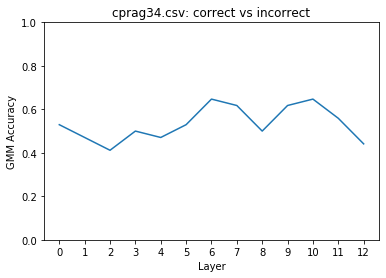

In [16]:
process_sentpair_dataset('cprag34.csv', 'correct', 'incorrect')

0 0.5454545454545454
1 0.5681818181818182
2 0.45454545454545453
3 0.45454545454545453
4 0.5
5 0.5454545454545454
6 0.5681818181818182
7 0.5227272727272727
8 0.45454545454545453
9 0.5
10 0.5
11 0.4318181818181818
12 0.4090909090909091


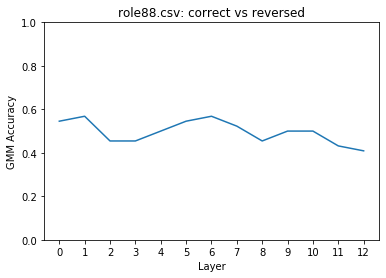

In [14]:
process_sentpair_dataset('role88.csv', 'correct', 'reversed')